<a href="https://colab.research.google.com/github/Erlang-929/ML/blob/main/GDGoC_Tel_U_Machine_Learning_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Name : Andika Erlang Ramadhan
#NIM : 101012430001

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score
%matplotlib inline

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

train.head()

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,1,Martin,727.0,Spain,Male,38.0,2,62276.99,1,Yes,Yes,59280.79,No,4,DIAMOND,757,0
1,2,Chinweuba,529.0,France,Female,29.0,8,0.00,2,Yes,NaN,19842.11,No,3,SILVER,476,0
2,3,Clapp,589.0,France,Female,50.0,4,0.00,2,No,Yes,182076.97,No,4,PLATINUM,441,0
3,4,Boni,515.0,France,Male,40.0,0,109542.29,1,Yes,Yes,166370.81,No,5,GOLD,312,0
4,5,Jamieson,528.0,Spain,Male,43.0,7,97473.87,2,Yes,Yes,159823.16,No,3,PLATINUM,654,0


In [ ]:
test.head()

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,2001,Ugonna,693,Germany,Male,44,5,124601.58,2,Yes,Yes,46998.13,Yes,2,SILVER,408
1,2002,Nebeolisa,607,Germany,Male,29,7,102609.00,1,Yes,No,163257.44,No,5,DIAMOND,800
2,2003,Tsai,689,Spain,Male,73,1,108555.07,1,No,Yes,167969.15,No,1,PLATINUM,623
3,2004,Downie,660,France,Female,38,5,110570.78,2,Yes,No,195906.59,No,1,SILVER,472
4,2005,Morehead,503,France,Male,38,1,0.00,2,Yes,Yes,95153.24,No,2,DIAMOND,433


In [ ]:
print(f'Train columns: {train.columns}')
print(f'Test columns: {test.columns}')

Train columns: Index(['ID', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned', 'Exited'],
      dtype='object')
Test columns: Index(['ID', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')


In [ ]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8030 entries, 0 to 8029
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8030 non-null   int64  
 1   Surname             8030 non-null   object 
 2   CreditScore         7603 non-null   float64
 3   Geography           8030 non-null   object 
 4   Gender              7607 non-null   object 
 5   Age                 7588 non-null   float64
 6   Tenure              8030 non-null   int64  
 7   Balance             8030 non-null   float64
 8   NumOfProducts       8030 non-null   int64  
 9   HasCrCard           8030 non-null   object 
 10  IsActiveMember      7628 non-null   object 
 11  EstimatedSalary     7664 non-null   float64
 12  Complain            8030 non-null   object 
 13  Satisfaction Score  8030 non-null   int64  
 14  Card Type           8030 non-null   object 
 15  Point Earned        8030 non-null   int64  
 16  Exited

In [ ]:
train.describe()

,ID,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Satisfaction Score,Point Earned,Exited
count,8030.000000,7603.000000,7588.000000,8030.000000,8030.000000,8030.000000,7664.000000,8030.000000,8030.000000,8030.000000
mean,4015.500000,650.572932,38.834212,4.997509,76760.274842,1.530386,99789.518316,3.019054,604.522540,0.199502
std,2318.205664,96.677445,10.553106,2.895015,62436.537619,0.580551,57475.475959,1.409365,226.282724,0.399651
min,1.000000,350.000000,18.000000,0.000000,0.000000,1.000000,91.750000,1.000000,119.000000,0.000000
25%,2008.250000,583.000000,32.000000,3.000000,0.000000,1.000000,50488.107500,2.000000,408.000000,0.000000
50%,4015.500000,651.000000,37.000000,5.000000,97562.950000,1.000000,100088.080000,3.000000,602.000000,0.000000
75%,6022.750000,717.000000,44.000000,7.000000,127849.000000,2.000000,149185.215000,4.000000,799.000000,0.000000
max,8030.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,5.000000,1000.000000,1.000000


In [ ]:
test.describe()

,ID,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Satisfaction Score,Point Earned
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3000.500000,649.385000,39.259500,5.071500,75307.837245,1.528000,101641.923545,2.992000,613.744500
std,577.494589,97.462615,10.363728,2.883148,62273.302177,0.585139,57652.801092,1.392805,224.550252
min,2001.000000,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,1.000000,220.000000
25%,2500.750000,583.000000,32.000000,2.000000,0.000000,1.000000,53457.045000,2.000000,422.000000
50%,3000.500000,654.000000,38.000000,5.000000,95477.550000,1.000000,100592.490000,3.000000,620.000000
75%,3500.250000,720.000000,44.000000,8.000000,126430.357500,2.000000,150789.077500,4.000000,805.250000
max,4000.000000,850.000000,80.000000,10.000000,216109.880000,4.000000,199929.170000,5.000000,1000.000000


In [ ]:
numerical_cols = [var for var in train.columns if train[var].dtype != 'object']
categorical_cols = [var for var in train.columns if train[var].dtype == 'object']

print('Numerical columns:')
print(numerical_cols)

Numerical columns:
['ID', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned', 'Exited']


In [ ]:
print('Categorical columns:')
print(categorical_cols)

Categorical columns:
['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type']


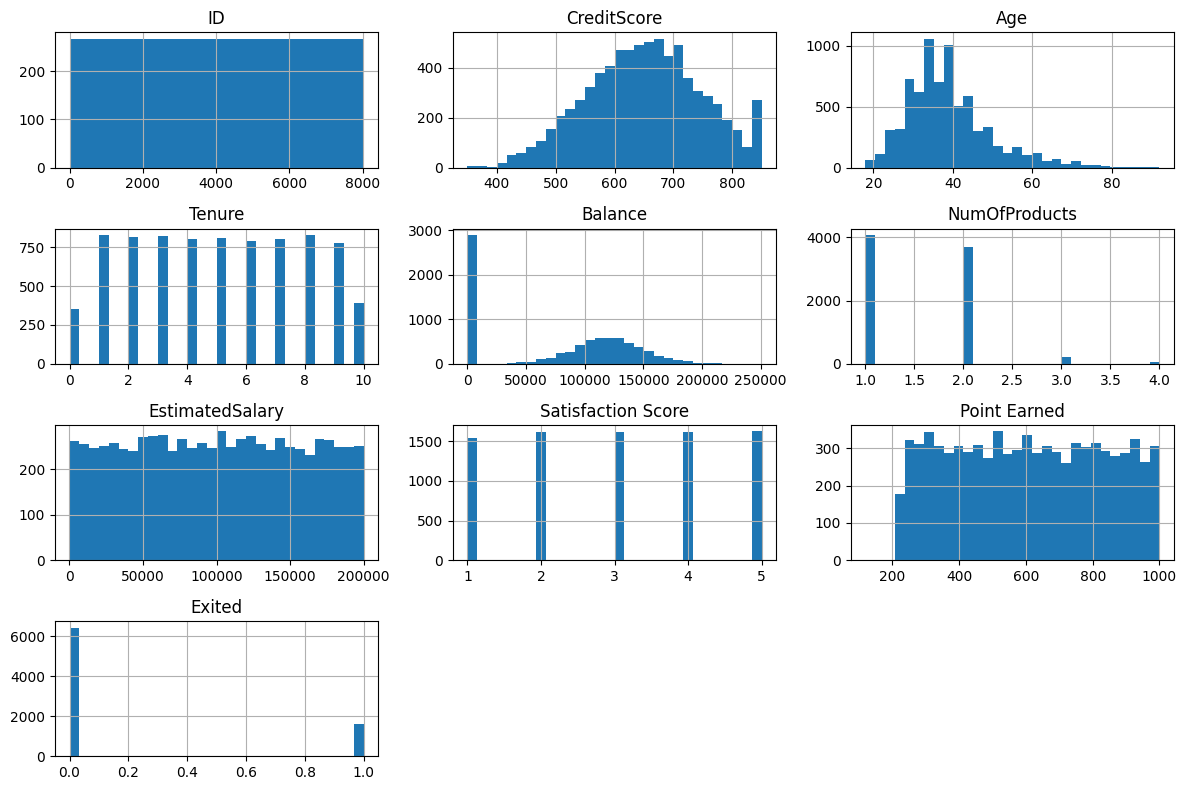

In [ ]:
train[numerical_cols].hist(bins=30, figsize=(12,8));
plt.tight_layout()
plt.show()

In [ ]:
r = 'Surname'
while(r in categorical_cols):
    categorical_cols.remove(r)

categorical_cols

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type']

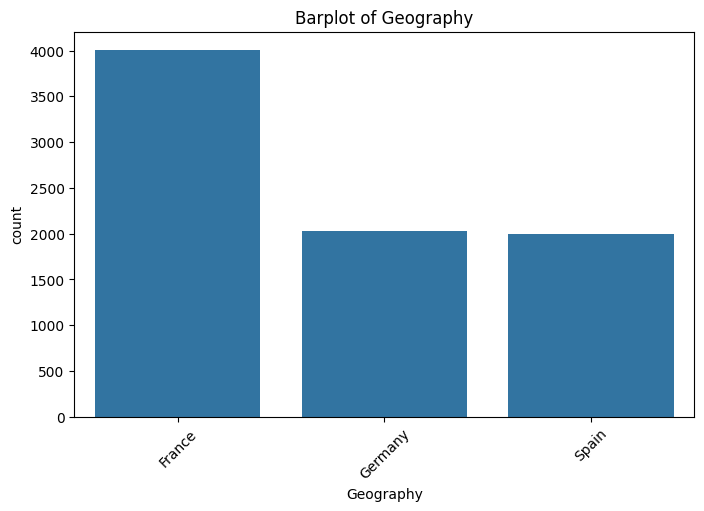

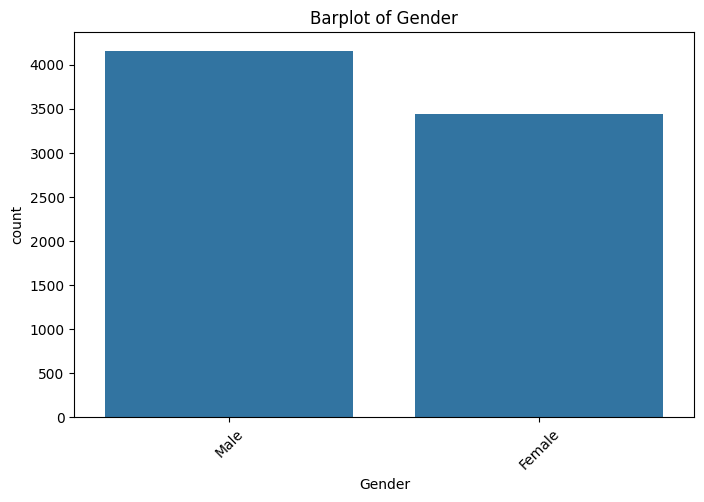

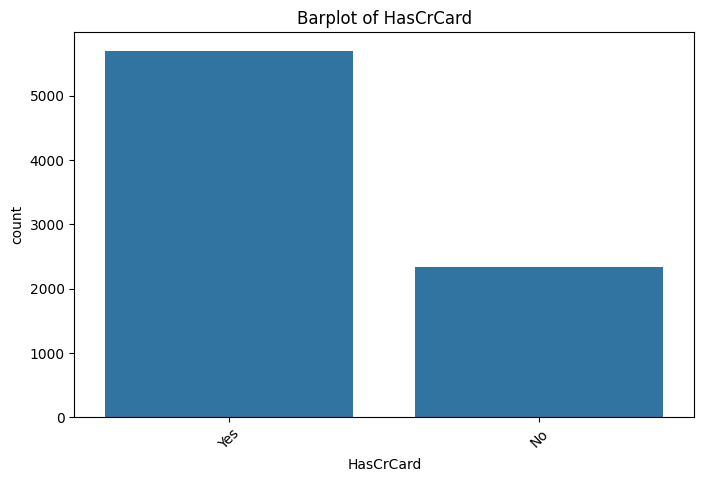

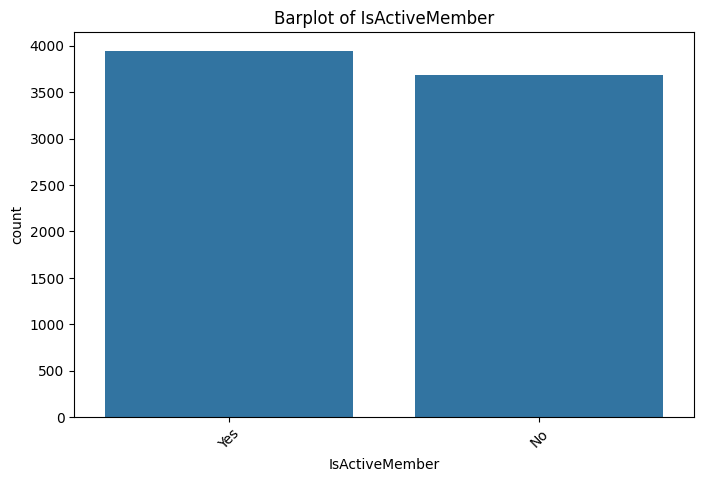

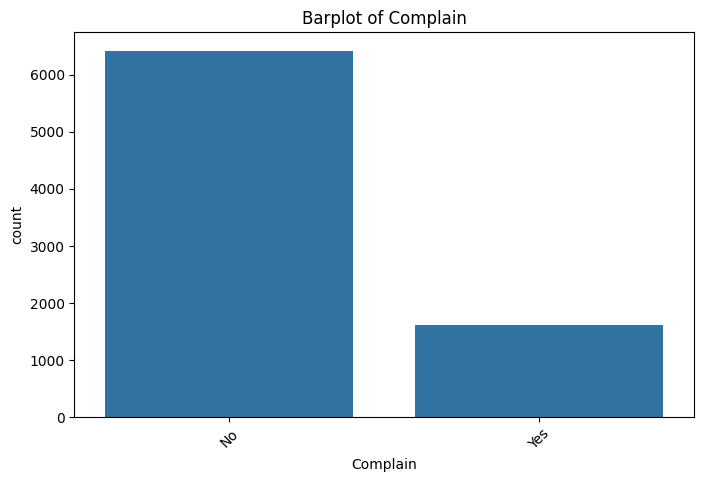

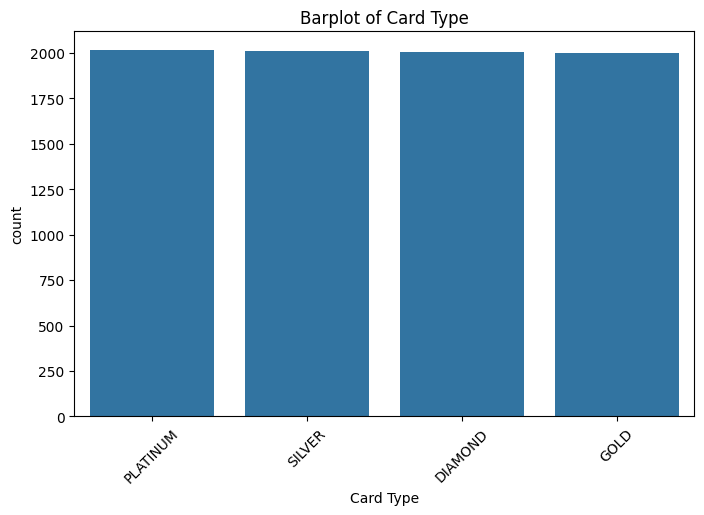

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train, x=col, order=train[col].value_counts().index)
    plt.title(f'Barplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
train2 = train.copy()

for col in categorical_cols:
    le = LabelEncoder()

    train2[col] = le.fit_transform(train2[col])

train2.head()

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,1,Martin,727.0,2,1,38.0,2,62276.99,1,1,1,59280.79,0,4,0,757,0
1,2,Chinweuba,529.0,0,0,29.0,8,0.00,2,1,2,19842.11,0,3,3,476,0
2,3,Clapp,589.0,0,0,50.0,4,0.00,2,0,1,182076.97,0,4,2,441,0
3,4,Boni,515.0,0,1,40.0,0,109542.29,1,1,1,166370.81,0,5,1,312,0
4,5,Jamieson,528.0,2,1,43.0,7,97473.87,2,1,1,159823.16,0,3,2,654,0


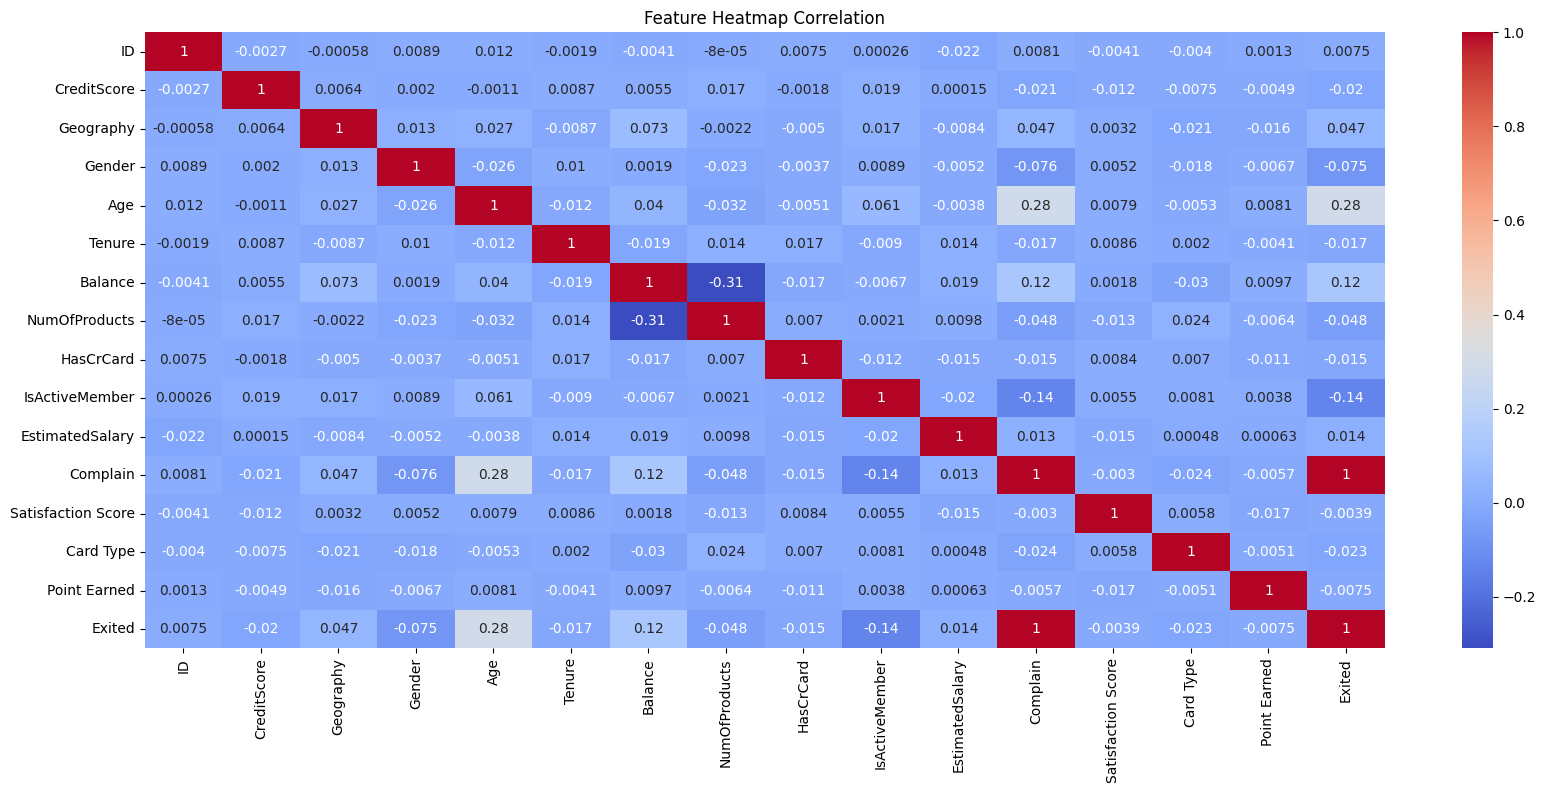

In [ ]:
num_corr = train2.drop('Surname', axis=1).corr()

plt.figure(figsize=(20,8))
sns.heatmap(num_corr, annot=True, cmap='coolwarm')
plt.title('Feature Heatmap Correlation')
plt.show()

In [ ]:
train.isna().sum().sort_values(ascending=False)

,0
Age,442
CreditScore,427
Gender,423
IsActiveMember,402
EstimatedSalary,366
ID,0
Point Earned,0
Card Type,0
Satisfaction Score,0
Complain,0


In [ ]:
test.isna().sum().sort_values(ascending=False)

,0
ID,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train['Complain'] = le.fit_transform(train['Complain'])
test['Complain'] = le.transform(test['Complain'])



In [ ]:
num_cols = ['Age', 'CreditScore', 'EstimatedSalary', 'Complain']

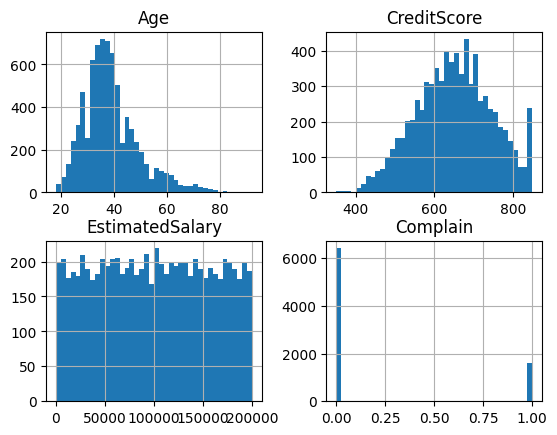

In [ ]:
train[['Age', 'CreditScore', 'EstimatedSalary','Complain']].hist(bins=40);

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Complain'}>]], dtype=object)

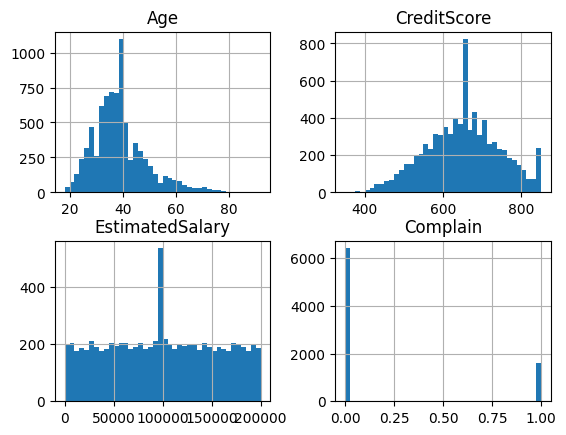

In [ ]:
for col in ['Age', 'CreditScore', 'EstimatedSalary', 'Complain']:
    train[col].fillna(train[col].mean(), inplace=True)

train[['Age', 'CreditScore', 'EstimatedSalary', 'Complain']].hist(bins=40)

In [ ]:
train.isna().sum().sort_values(ascending=False)

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [ ]:
train.duplicated().sum()

30

In [ ]:
train.drop_duplicates(inplace=True)

In [ ]:
train.duplicated().sum()

0

In [ ]:
for col in categorical_cols:
    print(train[col].value_counts())
    print('-'*50)

Geography
France     4006
Germany    2027
Spain      1997
Name: count, dtype: int64
--------------------------------------------------
Gender
Male      4162
Female    3445
Name: count, dtype: int64
--------------------------------------------------
HasCrCard
Yes    5700
No     2330
Name: count, dtype: int64
--------------------------------------------------
IsActiveMember
Yes    3948
No     3680
Name: count, dtype: int64
--------------------------------------------------
Complain
0    6422
1    1608
Name: count, dtype: int64
--------------------------------------------------
Card Type
PLATINUM    2017
SILVER      2010
DIAMOND     2003
GOLD        2000
Name: count, dtype: int64
--------------------------------------------------


In [ ]:
le = LabelEncoder()

for col in categorical_cols:
    le = LabelEncoder()

    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,727.0,2,1,38.0,2,62276.99,1,1,1,59280.79,0,4,0,757,0
1,529.0,0,0,29.0,8,0.00,2,1,2,19842.11,0,3,3,476,0
2,589.0,0,0,50.0,4,0.00,2,0,1,182076.97,0,4,2,441,0
3,515.0,0,1,40.0,0,109542.29,1,1,1,166370.81,0,5,1,312,0
4,528.0,2,1,43.0,7,97473.87,2,1,1,159823.16,0,3,2,654,0


In [ ]:
test.head()

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,2001,Ugonna,693,1,1,44,5,124601.58,2,1,1,46998.13,1,2,3,408
1,2002,Nebeolisa,607,1,1,29,7,102609.00,1,1,0,163257.44,0,5,0,800
2,2003,Tsai,689,2,1,73,1,108555.07,1,0,1,167969.15,0,1,2,623
3,2004,Downie,660,0,0,38,5,110570.78,2,1,0,195906.59,0,1,3,472
4,2005,Morehead,503,0,1,38,1,0.00,2,1,1,95153.24,0,2,0,433


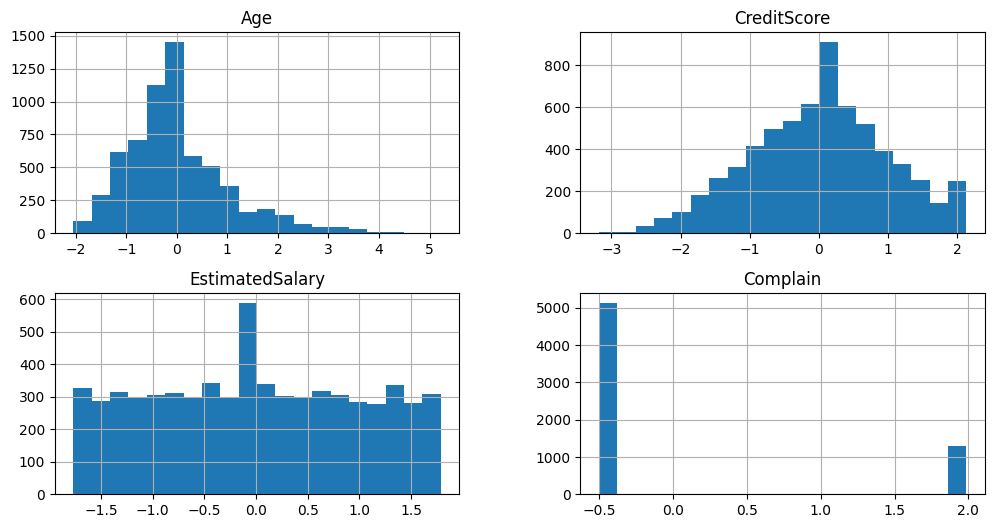

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])

X_train[num_cols].hist(bins=20, figsize=(12, 6))
plt.show()

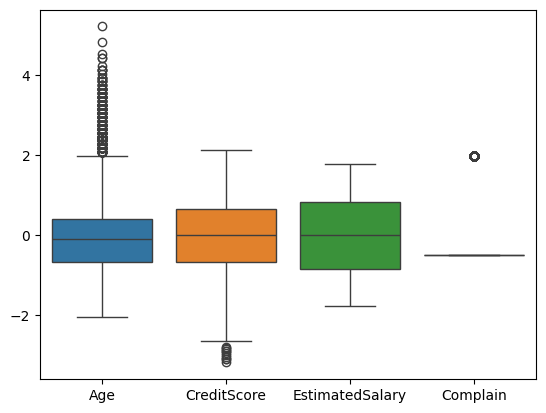

In [ ]:
sns.boxplot(data=X_train[num_cols])
plt.show()

In [ ]:

X = train.drop('Exited',axis=1) # features
y = train['Exited'] # target

X_train, X_val, y_train, y_val = train_test_split(
    X, # features
    y, # target
    test_size = 0.2, # test size for validation data 20%, 80% for train data
    random_state=42 # so that the result is fixed, because splitting data is actually random. you must use random_state!
)


X_train.shape, y_train.shape, X_val.shape, y_val.shape

((6400, 14), (6400,), (1600, 14), (1600,))

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score

# Inisialisasi model XGBoost
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Untuk klasifikasi biner
    n_estimators=100,  # Jumlah pohon
    max_depth=3,  # Kedalaman maksimum pohon
    learning_rate=0.1,  # Learning rate
    random_state=42  # Untuk reproduksibilitas
)

# Latih model
model.fit(X_train, y_train)

# Prediksi pada data validasi
y_pred = model.predict(X_val)

# Evaluasi model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"Akurasi: {accuracy}")
print(f"F1-Score: {f1}")




Akurasi: 0.99875
F1-Score: 0.9968454258675079


In [ ]:
test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,693,1,1,44,5,124601.58,2,1,1,46998.13,1,2,3,408
1,607,1,1,29,7,102609.00,1,1,0,163257.44,0,5,0,800
2,689,2,1,73,1,108555.07,1,0,1,167969.15,0,1,2,623
3,660,0,0,38,5,110570.78,2,1,0,195906.59,0,1,3,472
4,503,0,1,38,1,0.00,2,1,1,95153.24,0,2,0,433


In [ ]:
test_pred = model.predict(test.drop('Exited', axis=1))

In [ ]:
# Create a new 'Exited' column in the test DataFrame and assign predictions to it
test['Exited'] = test_pred

# Now, you can check the value counts of the predicted 'Exited' column
test['Exited'].value_counts()

,count
Exited,
0,1556
1,444


In [ ]:
print(test[['ID', 'Exited']])

        ID  Exited
0     2001       1
1     2002       0
2     2003       0
3     2004       0
4     2005       0
...    ...     ...
1995  3996       1
1996  3997       0
1997  3998       0
1998  3999       0
1999  4000       0

[2000 rows x 2 columns]


In [ ]:
submission = pd.read_csv('/content/sample_submission.csv')

submission

,ID,Exited
0,2001,1
1,2002,0
2,2003,0
3,2004,1
4,2005,0
...,...,...
1995,3996,1
1996,3997,0
1997,3998,1
1998,3999,0


In [ ]:
submission['Exited'] = test['Exited']

submission

,ID,Exited
0,2001,1
1,2002,0
2,2003,0
3,2004,0
4,2005,0
...,...,...
1995,3996,1
1996,3997,0
1997,3998,0
1998,3999,0


In [ ]:
submission.to_csv('my_first_submission.csv', index=False)